# MicroCreditLoanProject

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Data file.csv')
data.head(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,02-07-2016
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,05-07-2016
7,8,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,...,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,05-08-2016
8,9,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,...,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,15-06-2016
9,10,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,08-06-2016


In [3]:
data.shape

(209593, 37)

In [4]:
# Dropping the irrelevant column Unnamed:0
data.drop("Unnamed: 0",axis=1, inplace=True)
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


Observations:

1.The data has some erroneous characters in it. Hence, using the engine = 'python' while reading the file.

2.Apparently all the columns other than 'pcircle' and 'pdate' are numeric.

In [5]:
data.shape

(209593, 36)

In [6]:
data.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

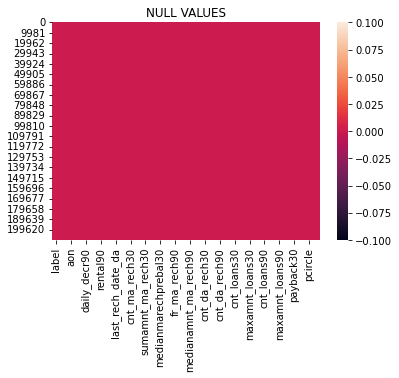

In [7]:
sns.heatmap(data.isnull())
plt.title('NULL VALUES')
plt.show()

There are no null values in the dataset.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

Observations:

The msisdn, pcircle and pdate are object types and all the other variables are numeric.

In [9]:
100*data['label'].value_counts()/data.shape[0]

1    87.517713
0    12.482287
Name: label, dtype: float64

Observations:

1.The target variable labels are imbalanced. 87.5% records are of class 1 and 12.5% records are of class 0.

2.We are dealing with an imbalance dataset.

In [10]:
data.agg(['skew','kurtosis']).T

,skew,kurtosis
label,-2.270254,3.154082
aon,10.392949,109.258003
daily_decr30,3.946230,30.971987
daily_decr90,4.252565,35.752305
rental30,4.521929,58.721169
rental90,4.437681,46.884796
last_rech_date_ma,14.790974,223.251362
last_rech_date_da,14.814857,224.267170
last_rech_amt_ma,3.781149,41.318834
cnt_ma_rech30,3.283842,41.067624


Observations:

All the variables are either moderately or highly positively skewed.

# Descriptive Statistics


In [11]:
data.describe(include='all')

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,209593,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593,209593
unique,NaN,186243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,82
top,NaN,04581I85330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPW,04-07-2016
freq,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209593,3150
mean,0.875177,NaN,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,NaN,NaN
std,0.330519,NaN,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,NaN,NaN
min,0.000000,NaN,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,1.000000,NaN,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,1.000000,NaN,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN,NaN
75%,1.000000,NaN,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN,NaN


Observations:

!.The target variable 'label' is imbalanced.
2.There are some unrealistic values in the variables.
3.All the variables are either moderately or highly positively skewed.
4.There are some extreme outliers in the dataset.
I will investigate each variable further.

# Data Cleaning


age on cellular network in days

In [12]:
data['aon'].describe()

count    209593.000000
mean       8112.343445
std       75696.082531
min         -48.000000
25%         246.000000
50%         527.000000
75%         982.000000
max      999860.755200
Name: aon, dtype: float64

In [13]:
data[data['aon'] < 0].shape

(1539, 36)

Observations:

There are about 1539 records with negative values in 'aon'.

There are some very large positive values in te 'aon' variable.

In [14]:
data[data['aon'] > 10000].shape

(2089, 36)

In [15]:
data[data['aon'] > 10000]['aon'].min()

500101.678

In [16]:
500101.677956991/365

1370.141583443811

Observations:

The smallest value above 10000 is 500101 which indicates 1370 years

In [17]:
print(f"About {data[data['aon'] > 10000].shape[0] + data[data['aon'] < 0].shape[0]} values, that is {round(100*(data[data['aon'] > 10000].shape[0] + data[data['aon'] < 0].shape[0])/data.shape[0],2)}% of the data are either negative values or extreme values in 'aon'.")


About 3628 values, that is 1.73% of the data are either negative values or extreme values in 'aon'.


Looking at the mean of all valid values

In [18]:
data[~(data['aon'] < 0) & ~(data['aon'] > 10000)][['aon']].mean()

aon    660.204418
dtype: float64

The central tendency of all valid values for sample where label = 1

In [19]:
#mean
data[~(data['aon'] < 0) & ~(data['aon'] > 10000) & (data['label']==1)][['aon']].mean()

aon    674.132159
dtype: float64

In [20]:
#median
data[data['label']==1]['aon'].median()

545.0

The central tendency of all valid values for sample where label = 0

In [21]:
#mean
data[~(data['aon'] < 0) & ~(data['aon'] > 10000) & (data['label']==0)][['aon']].mean()

aon    561.100634
dtype: float64

In [22]:
#median
data[data['label']==0]['aon'].median()

399.0

Checking if the extreme values could just be values in seconds or minutes instead of days.

Minutes to days

In [23]:
#median
(data[(data['aon'] > 10000) & (data['label'] == 0)][['aon']]/1440).median()

aon    519.849701
dtype: float64

In [24]:
#median
(data[(data['aon'] > 10000) & (data['label'] == 1)][['aon']]/1440).median()

aon    521.563965
dtype: float64

In [25]:
#median
(data[data['aon'] > 10000][['aon']]/1440).median()

aon    521.395472
dtype: float64

In [26]:
#mean
(data[(data['aon'] > 10000) & (data['label'] == 0)][['aon']]/86400).median()

aon    8.664162
dtype: float64

In [27]:
#median
(data[(data['aon'] > 10000) & (data['label'] == 1)][['aon']]/86400).median()

aon    8.692733
dtype: float64

Intuition:

1.About 3628 values, that is 1.73% are either negative values of extreme values in 'aon'. There are valuable information on the other variables for these rows. So instead of deleting these rows, I checked if there are any scope for convertions/imputation.

2.The number of days/age cannot be in negative. I am going remove the negative signs from these values.

3.I am considering 10000 days as the upper limit for convenience. The smallest value greater than 10000 in the 'aon' variable is 500101.68 which is approximately 1370 years. This cannot be a valid data. However, these could be minutes instead of days. I am considering these extreme values to be minutes because considering these as minutes is giving a significantly closer mean after conversion than when considering these as seconds. Hence I will consider these extreme values as minutes and convert those into days.

In [28]:
data[((data['aon'] < 0) & (data['label'] == 0))].head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
846,0,42858I88659,-16.0,1550.000000,1550.000000,1457.60,1549.01,1.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,03-07-2016
2435,0,51337I70785,-44.0,1.166667,1.166667,5.00,5.00,1.0,0.0,770,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,05-06-2016
2436,0,74913I89239,-23.0,6.066667,6.066667,365.30,365.30,1.0,0.0,770,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,26-06-2016
3443,0,02891I84453,-40.0,4.800000,4.800000,18.00,18.00,1.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,09-06-2016
4375,0,02362I90843,-34.0,7.750000,7.750000,813.75,813.75,1.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,15-06-2016


In [29]:
data[(data['aon'] < 0) & (data['label'] == 1)].head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
30,1,70130I90843,-42.0,8.864333,8.864333,780.71,780.71,780195.4971,0.0,773,...,6.0,1.0,1.000000,6,6,1.0,0.0,0.0,UPW,07-06-2016
197,1,46858I90841,-36.0,32.075333,32.075333,1557.53,1557.53,1.0000,0.0,1539,...,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,UPW,13-06-2016
322,1,03027I70379,-37.0,9.160000,9.160000,203.04,203.04,1.0000,0.0,770,...,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,UPW,12-06-2016
504,1,75670I84458,-36.0,11.470333,11.470333,40.04,40.04,1.0000,0.0,770,...,6.0,0.0,3565.786503,6,6,0.0,0.0,0.0,UPW,13-06-2016
603,1,58495I89235,-35.0,12.474000,12.474000,1823.08,1823.08,1.0000,0.0,1539,...,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,UPW,14-06-2016


picking a random variable for verification

In [30]:
data.loc[3,'aon']

241.0

Converting minutes(Extreme positive values) to days

In [31]:
def clean_aon(x):
    if x > 10000:
        return x//1440
    elif x < 0:
        return -x
    else:
        return x

In [32]:
data['aon'] = data['aon'].apply(clean_aon)

In [33]:
data['aon'] = round(data['aon'])

Verifying some random values

In [34]:
data.loc[847,'aon']

798.0

In [35]:
data.loc[31,'aon']

2171.0

In [36]:
data.loc[3,'aon']

241.0

In [37]:
data['aon'].min(), data['aon'].max()

(1.0, 2440.0)

Converting the type to int

<AxesSubplot:>

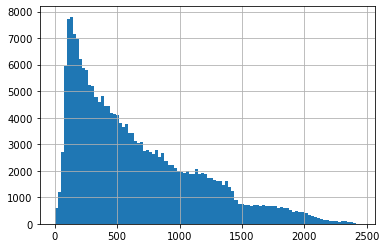

In [38]:
data['aon'] = data['aon'].astype('int')
data['aon'].hist(bins=100)

# msisdn
mobile number of user

In [39]:
print(data.loc[1,'msisdn'])

76462I70374


Observations:

There is an 'I' in the number. I will remove that 'I'.

In [40]:
def clean_msisdn(x):
    return x.replace("I","")

Cleaning the 'msisdn' variable and converting it to int

In [41]:
data['msisdn'] = data['msisdn'].apply(clean_msisdn).astype('float')

In [42]:
data[['msisdn']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   msisdn  209593 non-null  float64
dtypes: float64(1)
memory usage: 1.6 MB


array([[<AxesSubplot:title={'center':'msisdn'}>]], dtype=object)

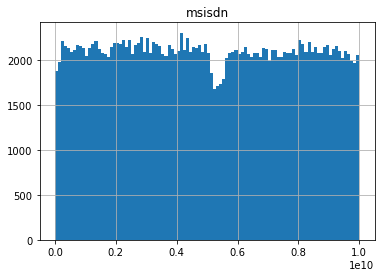

In [43]:
data[['msisdn']].hist(bins=100)

Observaions:

The variable distribution is almost close to uniform distribution. It would not make sense to encode it although it acts as an identifier because there are many unique values and only some are repeating.

# pcircle
telecom circle

In [44]:
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,2.140871e+09,272,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,1,7.646270e+09,712,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,1,1.794370e+09,535,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,1,5.577371e+09,241,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,1,3.813827e+08,947,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


In [45]:
data['pcircle'].nunique()

1

Observations:

There is only one category in the 'pcircle'. This feature can be dropped.
# pdate
date

In [46]:
pdate_unique_values = data['pdate'].unique()
pdate_unique_values.sort()
pdate_unique_values

array(['01-06-2016', '01-07-2016', '01-08-2016', '02-06-2016',
       '02-07-2016', '02-08-2016', '03-06-2016', '03-07-2016',
       '03-08-2016', '04-06-2016', '04-07-2016', '04-08-2016',
       '05-06-2016', '05-07-2016', '05-08-2016', '06-06-2016',
       '06-07-2016', '06-08-2016', '07-06-2016', '07-07-2016',
       '07-08-2016', '08-06-2016', '08-07-2016', '08-08-2016',
       '09-06-2016', '09-07-2016', '09-08-2016', '10-06-2016',
       '10-07-2016', '10-08-2016', '11-06-2016', '11-07-2016',
       '11-08-2016', '12-06-2016', '12-07-2016', '12-08-2016',
       '13-06-2016', '13-07-2016', '13-08-2016', '14-06-2016',
       '14-07-2016', '14-08-2016', '15-06-2016', '15-07-2016',
       '15-08-2016', '16-06-2016', '16-07-2016', '16-08-2016',
       '17-06-2016', '17-07-2016', '17-08-2016', '18-06-2016',
       '18-07-2016', '18-08-2016', '19-06-2016', '19-07-2016',
       '19-08-2016', '20-06-2016', '20-07-2016', '20-08-2016',
       '21-06-2016', '21-07-2016', '21-08-2016', '22-06

Observations:

1.The 'pdate' consists of records from 2016. There are records from 6th month to the 21st of the 8th month.

2.The year is not significant since its all 2016. However, the months and the days can be extracted and can be used as new features.
## daily_decr30
Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

In [47]:
data['daily_decr30'].describe()

count    209593.000000
mean       5381.402289
std        9220.623400
min         -93.012667
25%          42.440000
50%        1469.175667
75%        7244.000000
max      265926.000000
Name: daily_decr30, dtype: float64

In [48]:
data[data['daily_decr30'] < 0].shape

(1839, 36)

In [49]:
data[data['daily_decr30'] < 0]['daily_decr30'].max()

-0.000666667

Observations:

1.The 'daily_decr30' is the Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah).

2.Amount spent cannot be in negative since its the amount spent and not the balance. Hence I am going to remove the negative signs from the values considering that those negative signs are a data entry error.

3.There are some extreme large values. For example the max value 265926. We cannot consider these as invalid because these could be just natural outliers.

In [50]:
data['daily_decr30'].quantile([0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999])

0.991    43174.016000
0.992    44902.292544
0.993    46817.284000
0.994    49043.246720
0.995    51812.133200
0.996    55567.638208
0.997    60543.437568
0.998    68482.720000
0.999    81874.693053
Name: daily_decr30, dtype: float64

The value 81874 seem to jump at a larger interval than the previous values.

In [51]:
data[data['daily_decr30']> 81874]['label'].value_counts()

1    208
0      2
Name: label, dtype: int64

In [52]:
Q3 = data['daily_decr30'].quantile(0.75)
Q1 = data['daily_decr30'].quantile(0.25)
IQR = Q3 - Q1
print(f"Lower bound: {Q1 - (IQR*3)}, \n1st Quantile: {Q1}, \nIQR: {IQR}, \n3rd Quantile: {Q3}, \nUpper bound: {Q3 + (IQR*3)}")

Lower bound: -21562.24, 
1st Quantile: 42.44, 
IQR: 7201.56, 
3rd Quantile: 7244.0, 
Upper bound: 28848.68


In [53]:
data[data['daily_decr30']> 28848.68]['label'].value_counts()

1    5840
0      45
Name: label, dtype: int64

<AxesSubplot:>

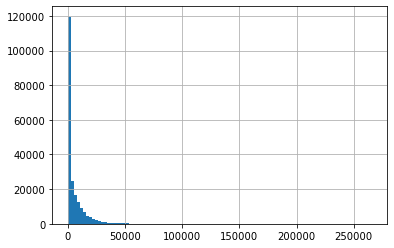

In [54]:
data['daily_decr30'].hist(bins=100)

In [55]:
print(f"About {round(100*data[data['daily_decr30']> 28848].shape[0]/data.shape[0],2)} % data are outliers.")

About 2.81 % data are outliers.


Observations:

1.The negative values are errors. I will remove the negative sign from it.

2.The large positive values are extreme outliers. However these could be natural outliers. So at the moment, I am going to leave them untouched.

In [56]:
def clean_daily_decr(x):
    if x < 0:
        return -x
    else:
        return x

<AxesSubplot:>

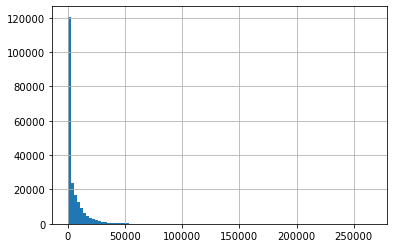

In [57]:
data['daily_decr30'] = data['daily_decr30'].apply(clean_daily_decr)
data['daily_decr30'].hist(bins=100)

In [58]:
data['daily_decr30'].min(),data['daily_decr30'].max()

(0.0, 265926.0)

In [59]:
data[data['daily_decr30']>28848.641].shape

(5885, 36)

## daily_decr90
Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

In [60]:
data['daily_decr90'].describe()

count    209593.000000
mean       6082.515068
std       10918.812767
min         -93.012667
25%          42.692000
50%        1500.000000
75%        7802.790000
max      320630.000000
Name: daily_decr90, dtype: float64

Observations:

1.Similar to daily_decr30, the daily_decr90 also have negative values and some extreme positive values.

2.I will remove the negative signs from the values since these are amounts spent.

In [61]:
data['daily_decr90'] = data['daily_decr90'].apply(clean_daily_decr)

In [62]:
data['daily_decr90'].min(), data['daily_decr90'].max()

(0.0, 320630.0)

## rental30
Average main account balance over last 30 days

In [63]:
data['rental30'].describe()

count    209593.000000
mean       2692.581910
std        4308.586781
min      -23737.140000
25%         280.420000
50%        1083.570000
75%        3356.940000
max      198926.110000
Name: rental30, dtype: float64

Observations:

1.The distribution is positively skewed due to outliers.

Looking at extreme outliers

In [64]:
Q3 = data['rental30'].quantile(0.75)
Q1 = data['rental30'].quantile(0.25)
IQR = Q3 - Q1
print(f"Lower bound: {Q1 - (IQR*3)}, \n1st Quantile: {Q1}, \nIQR: {IQR}, \n3rd Quantile: {Q3}, \nUpper bound: {Q3 + (IQR*3)}")

Lower bound: -8949.14, 
1st Quantile: 280.42, 
IQR: 3076.52, 
3rd Quantile: 3356.94, 
Upper bound: 12586.5


In [65]:
data[data['rental30'] < -8000]

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
26468,1,6.885708e+08,451,47822.832,48090.240,-23737.14,-24720.58,1.0,0.0,10000,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.00,UPW,01-07-2016
154995,1,6.047684e+09,380,2480.167,2480.167,-8898.94,-8898.94,1.0,0.0,8000,...,6.0,0.0,24.0,144,6,0.0,1.041667,1.08,UPW,29-06-2016


In [66]:
data[data['rental30'] > 12586.5].shape

(8117, 36)

Observations:

1.The account balance can be negative however, it depends on the credit limit allowed by the Business.

2.There are some extreme negative and positive values. These could be natural outliers depending on the credit limit.

array([[<AxesSubplot:title={'center':'rental30'}>]], dtype=object)

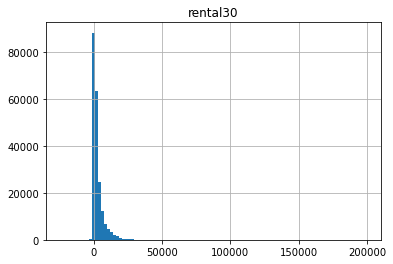

In [67]:
data[['rental30']].hist(bins=100)

## rental90
Average main account balance over last 90 days

In [68]:
data['rental90'].describe()

count    209593.000000
mean       3483.406534
std        5770.461279
min      -24720.580000
25%         300.260000
50%        1334.000000
75%        4201.790000
max      200148.110000
Name: rental90, dtype: float64

Observations:

1.Same as rental30, the rental90 is the average balance over a period of 90 days.

2.The average balance could be negative based on the credit limit allowed by the business. and the larger positive outliers can be natural outliers.
## last_rech_date_ma
Number of days till last recharge of main account

In [69]:
data['last_rech_date_ma'].describe()

count    209593.00000
mean       3755.84780
std       53905.89223
min         -29.00000
25%           1.00000
50%           3.00000
75%           7.00000
max      998650.37770
Name: last_rech_date_ma, dtype: float64

In [70]:
998650.377733/365

2736.0284321452054

Observations:

1.Number of days would not be in negative. So I will remove the negative sign.

2.The max values shows very exteme value. For example the max value 998650 indicates 2736 years which is not possible. So I am going to consider the large positive values as minutes/seconds and convert those into days.

3.Atleast 50% of the data is between the values 1 and 7.

In [71]:
data[data['last_rech_date_ma'] > 150]['last_rech_date_ma'].min()

500152.7257

Observations:

1.The immediate value greater than 150 in the variable is 500152, which is approximately 1370 years.

Converting Minutes to days

In [72]:
500152.72572636604/1440

347.32828175442086

In [73]:
998650.377733/1440

693.5072067590278

Observations:

1.The resulting number of days are much larger than the 75th percentile value 7.

Converting seconds to days

In [74]:
500152.72572636604/86400

5.7888046959070145

In [75]:
998650.377733/86400

11.558453445983796

Observations:

1.These resulting days are much closer to the 75th percentile value 7. So, I am going to consider the large values as seconds and convert them into days.

In [76]:
def clean_last_rech_date_ma(x):
  if x < 0:
    return -x
  elif x > 150:
    return x // 86400
  else:
    return x

array([[<AxesSubplot:title={'center':'last_rech_date_ma'}>]], dtype=object)

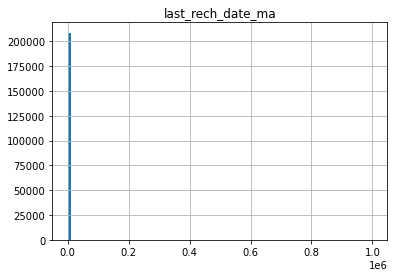

In [77]:
data[['last_rech_date_ma']].hist(bins=100)

In [78]:
data['last_rech_date_ma'].min(), data[['last_rech_date_ma']].max()

(-29.0,
 last_rech_date_ma    998650.3777
 dtype: float64)

In [79]:
data['last_rech_date_ma'] = data['last_rech_date_ma'].apply(clean_last_rech_date_ma).astype('int')

In [80]:
data['last_rech_date_ma'].min(), data[['last_rech_date_ma']].max()

(0,
 last_rech_date_ma    113
 dtype: int32)

array([[<AxesSubplot:title={'center':'last_rech_date_ma'}>]], dtype=object)

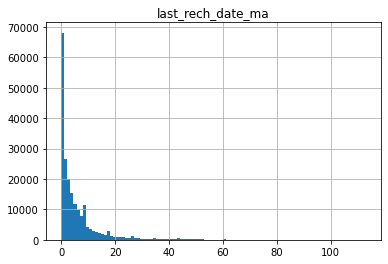

In [81]:
data[['last_rech_date_ma']].hist(bins=100)

## last_rech_date_da
Number of days till last recharge of data account

In [82]:
data['last_rech_date_da'].describe()

count    209593.000000
mean       3712.202921
std       53374.833430
min         -29.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      999171.809400
Name: last_rech_date_da, dtype: float64

Observations:

1.There are negative values and extreme positive values.

2.Atleast 50% of the values are 0s.

Intuition:

1.I am going to take the same approach for last_rech_date_da as last_rech_date_ma. Remove negative sign and consider the large positive values as seconds and convert them into days.

In [83]:
data[data['last_rech_date_da'] > 150]['last_rech_date_da'].min()

500032.6304

array([[<AxesSubplot:title={'center':'last_rech_date_da'}>]], dtype=object)

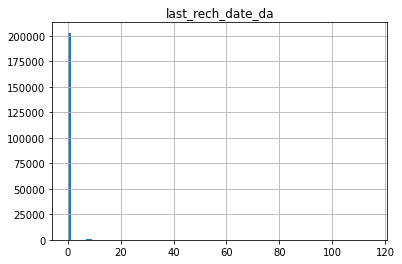

In [84]:
data['last_rech_date_da'] = data['last_rech_date_da'].apply(clean_last_rech_date_ma).astype('int')
data[['last_rech_date_da']].hist(bins=100)

In [85]:
data['last_rech_date_da'].min(), data['last_rech_date_da'].max()

(0, 115)

## last_rech_amt_ma
Amount of last recharge of main account (in Indonesian Rupiah)

In [86]:
data['last_rech_amt_ma'].describe()

count    209593.000000
mean       2064.452797
std        2370.786034
min           0.000000
25%         770.000000
50%        1539.000000
75%        2309.000000
max       55000.000000
Name: last_rech_amt_ma, dtype: float64

Observations:

1.There are positive outliers in the data.

2.There is no information about any limit on the recharge amount. These could be natural outliers. Hence, I am leaving them as they are for now.
## cnt_ma_rech30 & cnt_ma_rech90 & cnt_da_rech30, cnt_da_rech90
cnt_ma_rech30 -> Number of times main account got recharged in last 30 days

cnt_ma_rech90 -> Number of times main account got recharged in last 90 days

cnt_da_rech30 -> Number of times data account got recharged in last 30 days

cnt_da_rech90 -> Number of times data account got recharged in last 90 days

In [87]:
data['cnt_ma_rech30'].describe()

count    209593.000000
mean          3.978057
std           4.256090
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max         203.000000
Name: cnt_ma_rech30, dtype: float64

In [88]:
data['cnt_ma_rech90'].describe()

count    209593.00000
mean          6.31543
std           7.19347
min           0.00000
25%           2.00000
50%           4.00000
75%           8.00000
max         336.00000
Name: cnt_ma_rech90, dtype: float64

Observations:

1.There are some positive outliers in the variable. These could be natural outliers.

In [89]:
data[data['cnt_ma_rech30']>50]['cnt_ma_rech30'].value_counts()

52     4
61     4
51     3
54     3
58     2
60     2
53     2
55     2
84     1
99     1
71     1
203    1
115    1
77     1
91     1
78     1
59     1
64     1
74     1
63     1
Name: cnt_ma_rech30, dtype: int64

In [90]:
data[data['cnt_ma_rech90']>60]['cnt_ma_rech90'].value_counts()

63     19
61     13
70      9
64      9
67      9
65      9
68      9
69      8
62      8
74      8
72      7
80      7
81      6
66      6
79      6
82      6
71      6
73      5
77      4
75      4
83      3
78      3
99      2
84      2
91      2
90      2
100     2
85      2
86      2
92      2
97      2
96      1
336     1
118     1
151     1
104     1
88      1
87      1
127     1
110     1
132     1
121     1
98      1
105     1
140     1
93      1
94      1
172     1
120     1
Name: cnt_ma_rech90, dtype: int64

In [91]:
data[data['cnt_ma_rech30'] > data['cnt_ma_rech90']]

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate


Observations:

1.There are no records that have cnt_ma_rech30 > cnt_ma_rech90

In [92]:
data['cnt_da_rech30'].describe()

count    209593.000000
mean        262.578110
std        4183.897978
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       99914.441420
Name: cnt_da_rech30, dtype: float64

Observations:

Considering the 1st, 2nd and 3rd quartile values the max values is very unrealistic. These outliers are so unrealistic to be natural outliers. I am going to take the cube root to bring the values to a realistic range.

In [93]:
data[data['cnt_da_rech30']>35]['cnt_da_rech30'].min()

5056.007627

In [94]:
np.cbrt(99914.441420)

46.402646967382196

In [95]:
def update_cnt_da_reach30(x):
  return round(np.cbrt(x))

In [96]:
data['cnt_da_rech30'] = round(np.cbrt(data['cnt_da_rech30']))

In [97]:
data['cnt_da_rech30'].describe()

count    209593.000000
mean          0.195422
std           2.595527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          46.000000
Name: cnt_da_rech30, dtype: float64

In [98]:
data['cnt_da_rech90'].describe()

count    209593.000000
mean          0.041495
std           0.397556
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          38.000000
Name: cnt_da_rech90, dtype: float64

Observations:

The values are pretty realistic.

In [99]:
data[data['cnt_da_rech30'] > data['cnt_da_rech90']]

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
112,1,1.880989e+09,131,948.816667,950.500000,1969.49,2015.51,1,0,1539,...,6.0,0.0,2.00000,12,6,0.0,0.000000,1.000000,UPW,01-07-2016
121,1,2.124189e+09,1162,56.666667,56.666667,398.14,398.14,1,0,1539,...,6.0,0.0,2340.28012,36,6,0.0,5.500000,5.500000,UPW,17-06-2016
1490,0,9.725891e+09,1236,4115.220667,4130.330000,1710.40,3093.92,5,0,1539,...,6.0,0.0,2.00000,12,6,0.0,0.000000,0.000000,UPW,16-07-2016
1536,1,6.945391e+09,188,94.400000,94.400000,3542.50,3542.50,4,0,4048,...,6.0,0.0,4.00000,24,6,0.0,6.000000,6.000000,UPW,25-06-2016
2114,1,5.827391e+09,754,8653.260000,8682.600000,887.64,3480.72,1,0,770,...,6.0,0.0,4.00000,24,6,0.0,5.500000,5.666667,UPW,27-07-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208314,1,4.612191e+09,923,7017.000000,11066.410000,4888.73,5420.59,1,0,1539,...,12.0,0.5,2.00000,18,12,0.5,4.500000,4.500000,UPW,16-08-2016
208413,1,5.660695e+09,111,5425.000000,6598.730000,400.26,840.39,12,112,1539,...,6.0,0.0,1.00000,6,6,0.0,0.000000,0.000000,UPW,14-08-2016
208450,1,1.240985e+09,1436,8301.000000,10539.690000,3687.89,7512.47,6,0,1539,...,6.0,0.0,5.00000,30,6,0.0,0.000000,8.000000,UPW,11-08-2016
208695,1,4.357770e+09,497,7864.000000,8945.760000,2102.87,2282.87,8,0,2309,...,6.0,0.0,2.00000,12,6,0.0,7.000000,7.000000,UPW,07-08-2016


Observations:

There are about 1047 records which have value of cnt_da_rech30 > value of cnt_da_rech90.
Intuitions:

1.This cannot be correct. Because the count can increase as the days increase. It will not decrease. cnt_da_rech30 should be either less than or equal to cnt_da_rech90.

2.I am going to replace the value of cnt_da_rech30 with the value from cnt_da_rech90 whereever cnt_da_rech30 > cnt_da_rech90

In [100]:
data.loc[data['cnt_da_rech30'] > data['cnt_da_rech90'], 'cnt_da_rech30'] = np.nan
data['cnt_da_rech30'].fillna(data['cnt_da_rech90'], inplace=True)

In [101]:
data[data['cnt_da_rech30'] > data['cnt_da_rech90']]

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate


In [102]:
data['cnt_da_rech30'].describe()

count    209593.000000
mean          0.015845
std           0.135750
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.000000
Name: cnt_da_rech30, dtype: float64

In [103]:
data['cnt_da_rech90'].describe()

count    209593.000000
mean          0.041495
std           0.397556
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          38.000000
Name: cnt_da_rech90, dtype: float64

## fr_ma_rech30 & fr_ma_rech90 & fr_da_rech30 & fr_da_rech90
fr_ma_rech30 -> Frequency of main account recharged in last 30 days

fr_ma_rech90 -> Frequency of main account recharged in last 90 days

fr_da_rech30 -> Frequency of data account recharged in last 30 days

fr_da_rech90 -> Frequency of data account recharged in last 90 days

In [104]:
data['fr_ma_rech30'].describe()

count    209593.000000
mean       3737.355121
std       53643.625172
min           0.000000
25%           0.000000
50%           2.000000
75%           6.000000
max      999606.368100
Name: fr_ma_rech30, dtype: float64

In [105]:
data['fr_ma_rech90'].describe()

count    209593.000000
mean          7.716780
std          12.590251
min           0.000000
25%           0.000000
50%           2.000000
75%           8.000000
max          88.000000
Name: fr_ma_rech90, dtype: float64

Observations:

fr_ma_rech30

1.Based on the variable description provided, apparently this variable contains the number of days between each reacharge within 30 days.
2.There some extreme positive values in the variable. These values are very unrealistic.
3.Comparing the 75th quantile, the larger positive outliers will be considered as seconds and will be converted to days.
4.Since this measure is within 30 days, I am going to consider anything greater than 29 as an outlier.
fr_ma_rech90

1.The values look realistic.

In [106]:
data['fr_da_rech30'].describe()

count    209593.000000
mean       3749.494447
std       53885.414979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      999809.240100
Name: fr_da_rech30, dtype: float64

In [107]:
data['fr_da_rech90'].describe()

count    209593.000000
mean          0.045712
std           0.951386
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          64.000000
Name: fr_da_rech90, dtype: float64

Observations:

fr_da_rech30

1.Based on the variable description provided, apparently this variable contains the number of days between each reacharge within 30 days.
2.There some extreme positive values in the variable. These values are very unrealistic.
3.Comparing the 75th quantile, the larger positive outliers will be considered as seconds and will be converted to days.
4.Since this measure is within 30 days, I am going to consider anything greater than 29 as an outlier.
fr_da_rech90

1.The values look realistic.

In [108]:
data[data['fr_ma_rech30']>29]['fr_ma_rech30'].min()

30.0

In [109]:
data[data['fr_ma_rech30']>29]['fr_ma_rech30'].shape

(1465,)

In [110]:
data[data['fr_ma_rech30']>40]['fr_ma_rech30'].min()

500858.6601

Intuitions:

1.I will set 29 for values between 30 and 40 and consider the values above 40 (starting from 500858) as seconds and convert those into days.

In [111]:
data[data['fr_ma_rech30']>40]['fr_ma_rech30'].max()

999606.3681

In [112]:
999606.368131936//86400

11.0

In [113]:
def clean_fr_rech(x):
  if 29 < x < 40:
    return 29
  elif x > 40:
    return x // 86400
  else: return x 

In [114]:
data['fr_ma_rech30'] = data['fr_ma_rech30'].apply(clean_fr_rech).astype('int')
data['fr_da_rech30'] = data['fr_da_rech30'].apply(clean_fr_rech).astype('int')

In [115]:
data['fr_ma_rech30'].describe()

count    209593.000000
mean          3.904940
std           5.373617
min           0.000000
25%           0.000000
50%           2.000000
75%           6.000000
max          29.000000
Name: fr_ma_rech30, dtype: float64

In [116]:
data['fr_da_rech30'].describe()

count    209593.000000
mean          0.058909
std           0.736650
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          25.000000
Name: fr_da_rech30, dtype: float64

## sumamnt_ma_rech30 & sumamnt_ma_rech90
sumamnt_ma_rech30 - > Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

sumamnt_ma_rech90 - > Total amount of recharge in main account over last 90 days (in Indonesian Rupiah)

In [117]:
data['sumamnt_ma_rech30'].describe()

count    209593.000000
mean       7704.501157
std       10139.621714
min           0.000000
25%        1540.000000
50%        4628.000000
75%       10010.000000
max      810096.000000
Name: sumamnt_ma_rech30, dtype: float64

In [118]:
data['sumamnt_ma_rech90'].describe()

count    209593.000000
mean      12396.218352
std       16857.793882
min           0.000000
25%        2317.000000
50%        7226.000000
75%       16000.000000
max      953036.000000
Name: sumamnt_ma_rech90, dtype: float64

Observations:

1.There are extreme positive outliers. However, these could be natural outliers although these look like unrealistic values 2.Since there are no restriction information about the max amount of reacharge allowed.
### medianamnt_ma_rech30 & medianamnt_ma_rech90
medianamnt_ma_rech30 -> Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

medianamnt_ma_rech90 -> Median of amount of recharges done in main account over last 90 days at user level (in Indonesian Rupiah)

In [119]:
data['medianamnt_ma_rech30'].describe()

count    209593.000000
mean       1812.817952
std        2070.864620
min           0.000000
25%         770.000000
50%        1539.000000
75%        1924.000000
max       55000.000000
Name: medianamnt_ma_rech30, dtype: float64

In [120]:
data['medianamnt_ma_rech90'].describe()

count    209593.000000
mean       1864.595821
std        2081.680664
min           0.000000
25%         773.000000
50%        1539.000000
75%        1924.000000
max       55000.000000
Name: medianamnt_ma_rech90, dtype: float64

Observations:

1.The min, max and the quartiles are the same for both variables. They can be different or same based on the recharges done by the customer in 30 day and in 90 days.

2.There are large positive outliers. However, these could be natural outliers although these look like unrealistic values Since there are no restriction information about the max amount of reacharge allowed.

In [121]:
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,2.140871e+09,272,3055.050000,3065.150000,220.13,260.13,2,0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,1,7.646270e+09,712,12122.000000,12124.750000,3691.26,3691.26,20,0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,1,1.794370e+09,535,1398.000000,1398.000000,900.13,900.13,3,0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,1,5.577371e+09,241,21.228000,21.228000,159.42,159.42,41,0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,1,3.813827e+08,947,150.619333,150.619333,1098.90,1098.90,4,0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


### medianmarechprebal30 & medianmarechprebal90
medianmarechprebal30 -> Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

medianmarechprebal90 -> Median of main account balance just before recharge in last 90 days at user level (in Indonesian Rupiah)

In [122]:
data['medianmarechprebal30'].describe()

count    209593.000000
mean       3851.927942
std       54006.374433
min        -200.000000
25%          11.000000
50%          33.900000
75%          83.000000
max      999479.419300
Name: medianmarechprebal30, dtype: float64

In [123]:
data['medianmarechprebal90'].describe()

count    209593.000000
mean         92.025541
std         369.215658
min        -200.000000
25%          14.600000
50%          36.000000
75%          79.310000
max       41456.500000
Name: medianmarechprebal90, dtype: float64

Observations:

1.The median of account balance can be negative.
2.There are some very large positive values in the variable. These could be natural outliers.

In [124]:
data[data['medianmarechprebal30']>27700]['medianmarechprebal30'].min()

500547.3566

In [125]:
832648.305572/2309.0

360.60992012646165

In [126]:
data[data['medianmarechprebal30']>27700].shape

(1047, 36)

### cnt_loans30 & cnt_loans90
cnt_loans30 -> Number of loans taken by user in last 30 days

cnt_loans90 -> Number of loans taken by user in last 90 days

In [127]:
data['cnt_loans30'].describe()

count    209593.000000
mean          2.758981
std           2.554502
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          50.000000
Name: cnt_loans30, dtype: float64

In [128]:
data['cnt_loans90'].describe()

count    209593.000000
mean         18.520919
std         224.797423
min           0.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        4997.517944
Name: cnt_loans90, dtype: float64

observations:

There are no information about any restrictions on the number of times a customer can avail loans. Hence the values can be considered as realistic.

In [129]:
data[data['cnt_loans30'] > data['cnt_loans90']]

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate


### amnt_loans30 & amnt_loans90
amnt_loans30 -> Total amount of loans taken by user in last 30 days

amnt_loans90 -> Total amount of loans taken by user in last 90 days

In [130]:
data['amnt_loans30'].describe()

count    209593.000000
mean         17.952021
std          17.379741
min           0.000000
25%           6.000000
50%          12.000000
75%          24.000000
max         306.000000
Name: amnt_loans30, dtype: float64

In [131]:
data['amnt_loans90'].describe()

count    209593.000000
mean         23.645398
std          26.469861
min           0.000000
25%           6.000000
50%          12.000000
75%          30.000000
max         438.000000
Name: amnt_loans90, dtype: float64

Observations:

1.There are no information about any restrictions on the number of times a customer can get loan. Hence these values look realistic.
### maxamnt_loans30 & maxamnt_loans90
maxamnt_loans30 -> maximum amount of loan taken by the user in last 30 days

maxamnt_loans90 -> maximum amount of loan taken by the user in last 90 days

In [132]:
data['maxamnt_loans30'].describe()

count    209593.000000
mean        274.658747
std        4245.264648
min           0.000000
25%           6.000000
50%           6.000000
75%           6.000000
max       99864.560860
Name: maxamnt_loans30, dtype: float64

In [133]:
data['maxamnt_loans90'].describe()

count    209593.000000
mean          6.703134
std           2.103864
min           0.000000
25%           6.000000
50%           6.000000
75%           6.000000
max          12.000000
Name: maxamnt_loans90, dtype: float64

Observations:

###### maxamnt_loans30:

1.There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively

2.There are different values also in the variable.

3.There could also be zeros for customer who did not take a loan.
##### maxamnt_loans90:

The values seem to be realistic and correct.

In [134]:
data[~data['maxamnt_loans30'].isin([0,6,12])].shape

(1047, 36)

In [135]:
data['maxamnt_loans30'].value_counts()

6.00000        179193
12.00000        26109
0.00000          3244
17083.99814         1
62511.75070         1
                ...  
30346.38585         1
66821.81906         1
55716.81724         1
41580.15663         1
96927.24325         1
Name: maxamnt_loans30, Length: 1050, dtype: int64

In [136]:
data[(data['maxamnt_loans30'].isin([0,6,12])) & (data['label'] == 0)]['maxamnt_loans30'].mode()

0    6.0
Name: maxamnt_loans30, dtype: float64

In [137]:
data[(data['maxamnt_loans30'].isin([0,6,12])) & (data['label'] == 1)]['maxamnt_loans30'].mode()

0    6.0
Name: maxamnt_loans30, dtype: float64

In [138]:
data.loc[~data['maxamnt_loans30'].isin([0,6,12]),'maxamnt_loans30'] = 6.0

In [139]:
data['maxamnt_loans30'].value_counts()

6.0     180240
12.0     26109
0.0       3244
Name: maxamnt_loans30, dtype: int64

### medianamnt_loans30 & medianamnt_loans90
medianamnt_loans30 -> Median of amounts of loan taken by the user in last 30 days

medianamnt_loans90 -> Median of amounts of loan taken by the user in last 90 days

Based on the allowed loan repayment amounts 6 and 12, the median could be 0,3,6,9 or 12.

In [140]:
data['medianamnt_loans30'].describe()

count    209593.000000
mean          0.054029
std           0.218039
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: medianamnt_loans30, dtype: float64

In [141]:
data['medianamnt_loans90'].describe()

count    209593.000000
mean          0.046077
std           0.200692
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: medianamnt_loans90, dtype: float64

Observations:

The values are looking good.
### payback30 & payback90
payback30 -> Average payback time in days over last 30 days

payback90 -> Average payback time in days over last 90 days

In [142]:
data['payback30'].describe()

count    209593.000000
mean          3.398826
std           8.813729
min           0.000000
25%           0.000000
50%           0.000000
75%           3.750000
max         171.500000
Name: payback30, dtype: float64

In [143]:
data['payback90'].describe()

count    209593.000000
mean          4.321485
std          10.308108
min           0.000000
25%           0.000000
50%           1.666667
75%           4.500000
max         171.500000
Name: payback90, dtype: float64

In [144]:
data[(data['payback30']>5) & (data['label'] == 1)].shape

(33729, 36)

ntuition:

Since these are the average payback time, and since the customer will be a defaulter if they din't pay back the loan amount within 5 days of issuing the loan, I would expect the Average payback value to be less than or equal to 5 for records with label = 1 and Average payback value to be greater than 5 for records with label = 0.

In [145]:
def set_payback_below_30days(x):
  if x > 29:
    return 29
  else:
    return x

def set_payback_below_90days(x):
  if x > 89:
    return 89
  else:
    return x

In [146]:
data['payback30'] = data['payback30'].apply(set_payback_below_30days)
data['payback90'] = data['payback90'].apply(set_payback_below_90days)

In [147]:
data['payback30'].describe()

count    209593.000000
mean          2.955970
std           5.242551
min           0.000000
25%           0.000000
50%           0.000000
75%           3.750000
max          29.000000
Name: payback30, dtype: float64

In [148]:
data['payback90'].describe()

count    209593.000000
mean          4.229368
std           9.294854
min           0.000000
25%           0.000000
50%           1.666667
75%           4.500000
max          89.000000
Name: payback90, dtype: float64

In [149]:
data.loc[((data['payback30'] < 6) & (data['label'] == 0)), ['payback30', 'payback90']]

,payback30,payback90
11,0.0,0.0
15,0.0,0.0
16,0.0,0.0
21,0.0,0.0
24,0.0,0.0
...,...,...
209547,0.0,0.0
209549,0.0,25.5
209554,0.0,0.0
209571,0.0,0.0


In [150]:
data.loc[((data['payback90'] < 6) & (data['label'] == 0)), ['payback30', 'payback90']]

,payback30,payback90
11,0.0,0.0
15,0.0,0.0
16,0.0,0.0
21,0.0,0.0
24,0.0,0.0
...,...,...
209541,0.0,0.0
209547,0.0,0.0
209554,0.0,0.0
209571,0.0,0.0


Setting payback30 and payback90 as 8 for records that have label = 0 and payback30 and payback90 within 5.



In [151]:
data.loc[((data['payback30'] < 6) & (data['label'] == 0)), 'payback30'] = 8
data.loc[((data['payback90'] < 6) & (data['label'] == 0)), 'payback90'] = 8
data.loc[((data['payback30'] > 6) & (data['label'] == 1)), ['payback30', 'payback90']]

,payback30,payback90
5,11.000000,8.333333
31,10.000000,10.000000
35,11.000000,11.000000
37,7.500000,19.750000
41,12.000000,12.000000
...,...,...
209542,22.500000,22.500000
209556,10.333333,6.250000
209560,8.200000,7.500000
209561,7.000000,2.347826


In [152]:
data.loc[((data['payback90'] > 6) & (data['label'] == 1)), ['payback30', 'payback90']]

,payback30,payback90
5,11.000000,8.333333
22,0.000000,42.000000
31,10.000000,10.000000
35,11.000000,11.000000
37,7.500000,19.750000
...,...,...
209570,11.500000,7.400000
209573,5.615385,6.357143
209579,6.000000,6.142857
209587,0.000000,30.000000


Setting payback30 and payback90 as 4 for records that have label = 1 and payback30 and payback90 greater than 5.



In [153]:
data.loc[((data['payback30'] > 6) & (data['label'] == 1)), 'payback30'] = 4
data.loc[((data['payback90'] > 6) & (data['label'] == 1)), 'payback90'] = 4

In [154]:
data['payback30'].describe()

count    209593.000000
mean          2.692054
std           3.149882
min           0.000000
25%           0.000000
50%           2.200000
75%           4.000000
max          29.000000
Name: payback30, dtype: float64

In [155]:
data['payback90'].describe()

count    209593.000000
mean          3.025971
std           4.317045
min           0.000000
25%           0.000000
50%           2.700000
75%           4.000000
max          89.000000
Name: payback90, dtype: float64

In [156]:
data.loc[((data['payback30'] < 6) & (data['label'] == 0)), ['payback30', 'payback90']]
data.loc[((data['payback90'] < 6) & (data['label'] == 0)), ['payback30', 'payback90']]
data.loc[((data['payback30'] > 6) & (data['label'] == 1)), ['payback30', 'payback90']]
data.loc[((data['payback90'] > 6) & (data['label'] == 1)), ['payback30', 'payback90']]

,payback30,payback90


### Feature Engineering
#### Extracting month and day from pdate

In [157]:
data['pmonth'] = data['pdate'].apply(lambda x: x.split('-')[1])
data['pday'] = data['pdate'].apply(lambda x: x.split('-')[2])
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,pmonth,pday
0,0,2.140871e+09,272,3055.050000,3065.150000,220.13,260.13,2,0,1539,...,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016,07,2016
1,1,7.646270e+09,712,12122.000000,12124.750000,3691.26,3691.26,20,0,5787,...,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016,08,2016
2,1,1.794370e+09,535,1398.000000,1398.000000,900.13,900.13,3,0,1539,...,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016,08,2016
3,1,5.577371e+09,241,21.228000,21.228000,159.42,159.42,41,0,947,...,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016,06,2016
4,1,3.813827e+08,947,150.619333,150.619333,1098.90,1098.90,4,0,2309,...,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016,06,2016


### Exploratory Data Analysis

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

ValueError: could not convert string to float: 'UPW'

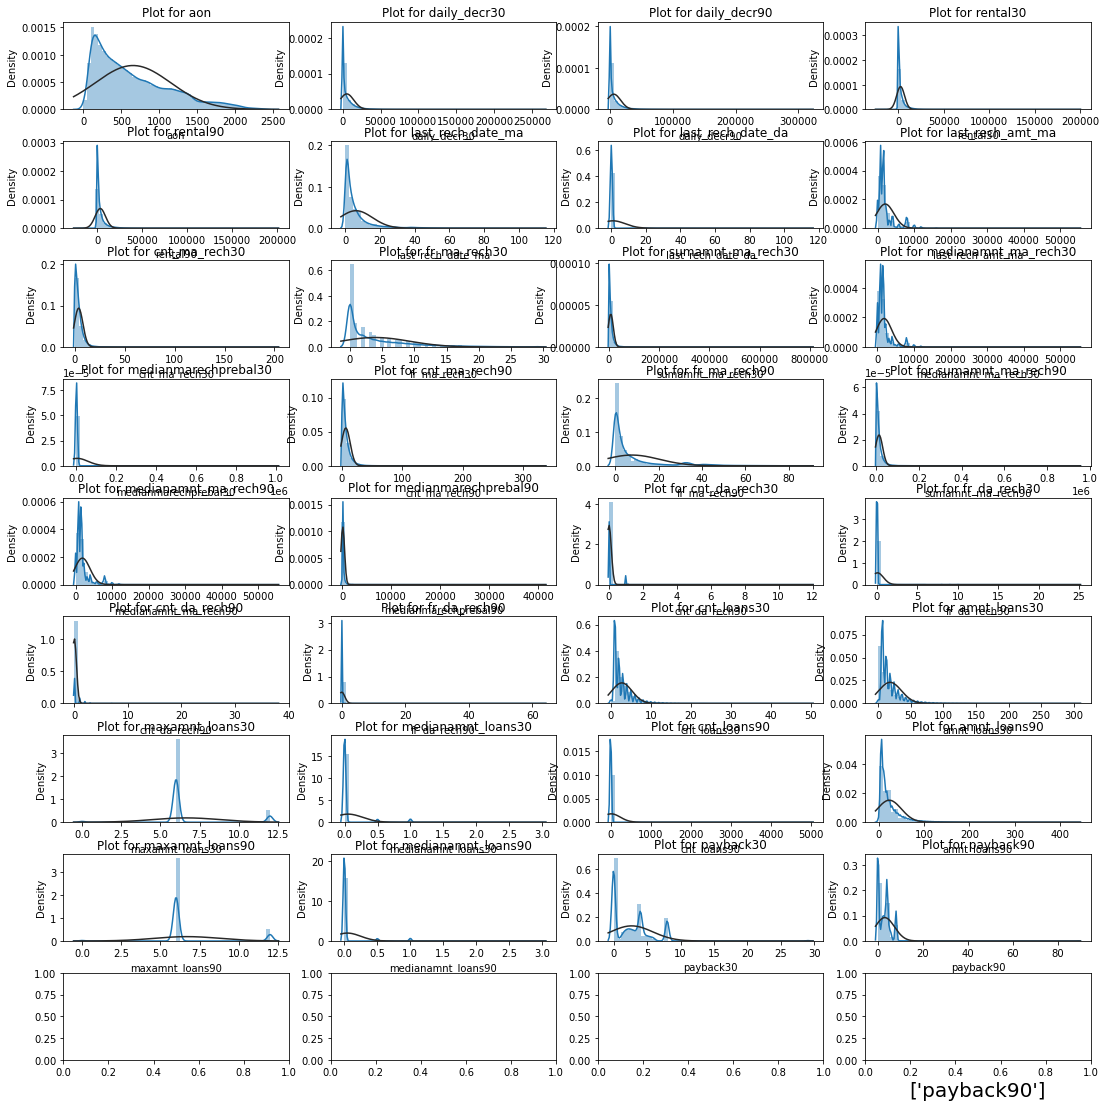

In [159]:
f,ax = plt.subplots(9,4,figsize=(15,15))
f.tight_layout()

i,j = 0,0
for col in data.iloc[:,2:-2].columns:
    graph = sns.distplot(data[col],fit=norm, ax=ax[i,j])
    plt.xlabel([col],fontsize = 20)
    ax[i,j].set_title(f'Plot for {col}')
    
    j+=1
    if j%4==0:
        i+=1
        j=0

### Data Analysis
Univariant analysis

In [160]:
def show_distribution(data, col):
        plt.figure(figsize=(15,5))        
        plt.title(f"Distribution on {col}")
        
        plt.axvline(np.mean(data[data['label']==0][col]), color='b', linestyle='--')
        plt.axvline(np.mean(data[data['label']==1][col]), color='y', linestyle='--')        
        
        
        sns.distplot(data[data['label']==0][col], hist=False, color='b',)
        sns.distplot(data[data['label']==1][col], hist=False, color='y')
        

        plt.legend(['Defaulter','non-Defaulter'])
        plt.show()

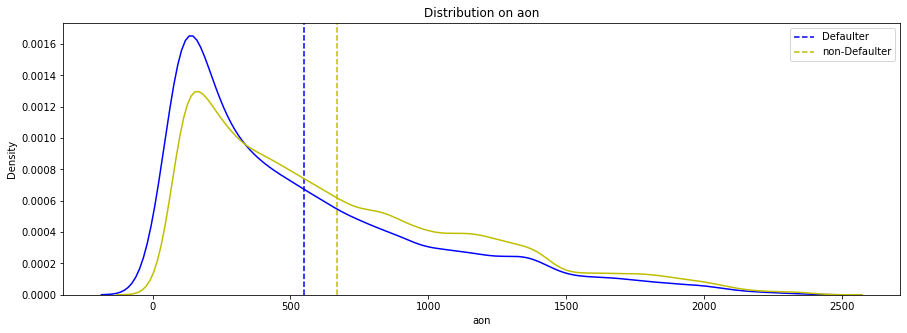

In [161]:
show_distribution(data, 'aon')

Observations:

1.After cleaning the date, the 'aon' variable can distinguish between the labels 1 and 0.

2.The tenure of defaulters on an average is lesser than the tenure of defaulters on the cellular network.

### daily_decr30

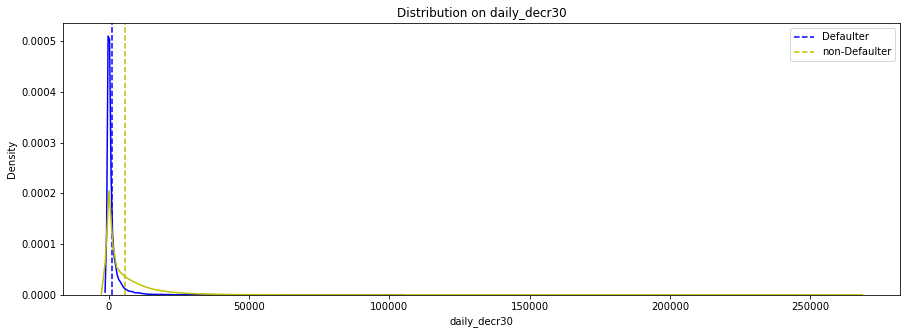

In [162]:
show_distribution(data, 'daily_decr30')

Observations:

Most of the values are pretty close.
The labels 0 and 1 are some what distinguished.
The daily spent amount for 30 days for defaulters is lesser than non defaulters on an average.

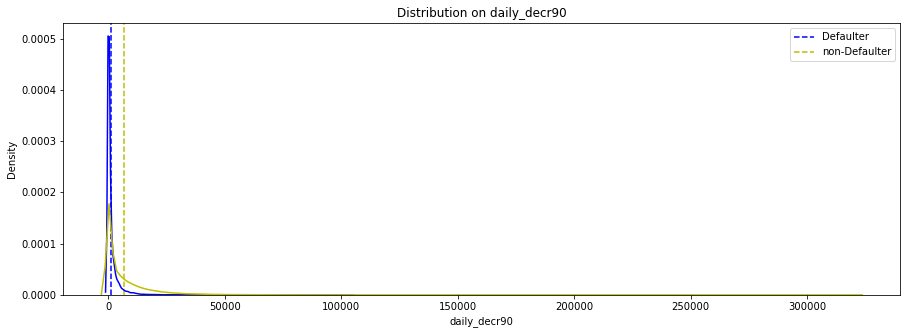

In [163]:
###daily_decr90
show_distribution(data,'daily_decr90')

Observations:

Most of the values are pretty close. The labels 0 and 1 are some what distinguished.
The daily spent amount for 90 days for defaulters is slightly lesser than non defaulters on an average.

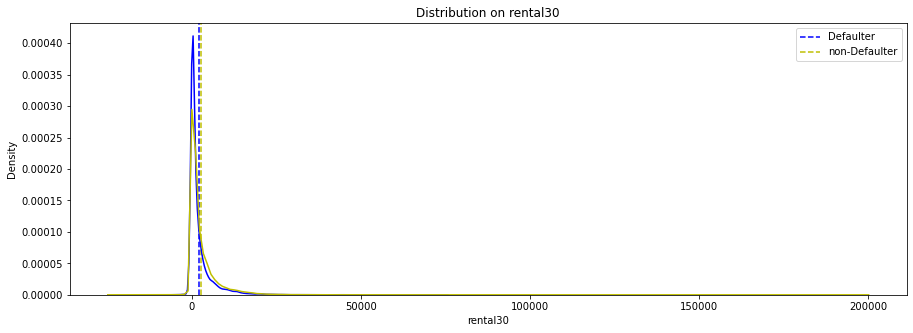

In [164]:
##rental30
show_distribution(data,'rental30')

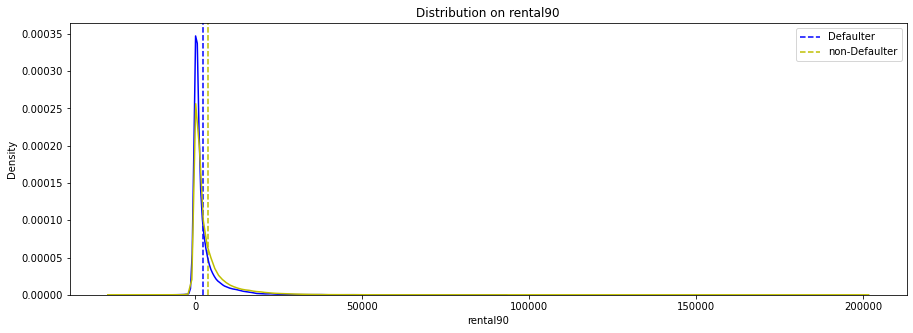

In [165]:
### rental90
show_distribution(data,'rental90')

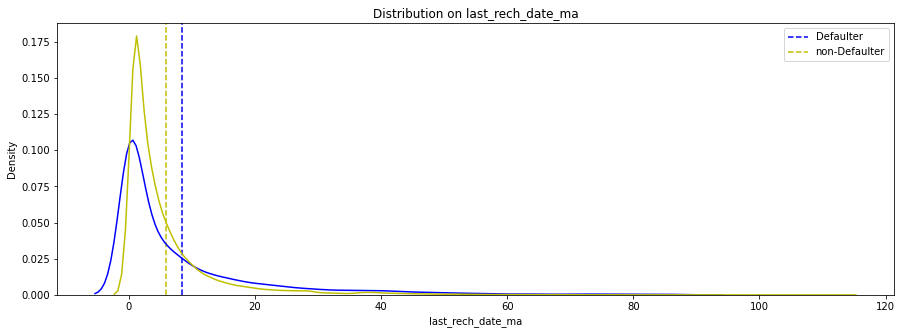

In [166]:
###last_rech_date_ma
show_distribution(data,'last_rech_date_ma')

Observations:

The classes 0 and 1 are showing some differences.
The last recharge date on the main account is slightly lesser for non-defaulters than defaulters.

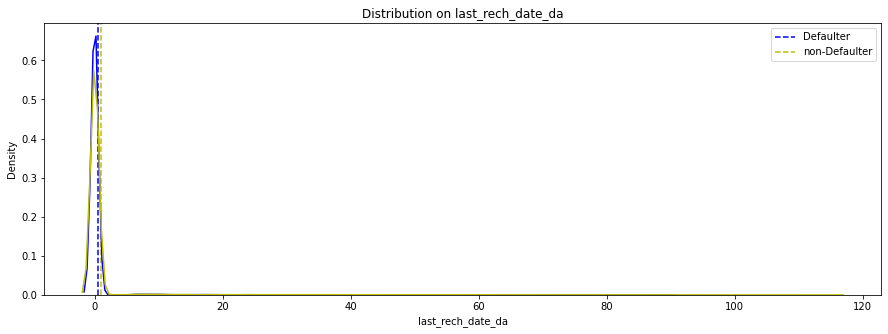

In [167]:
###last_rech_date_da
show_distribution(data,'last_rech_date_da')

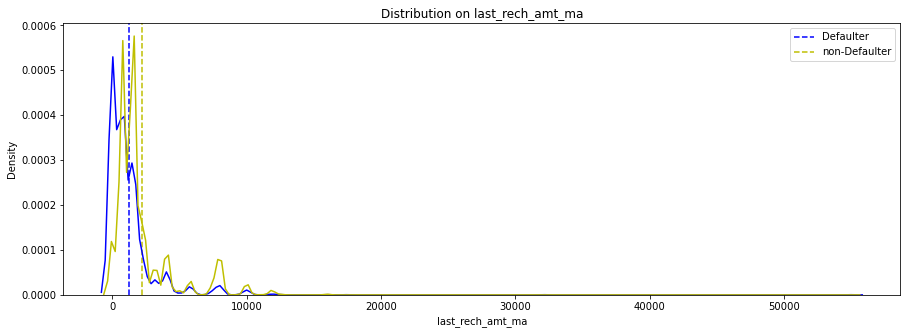

In [168]:
### last_rech_amt_ma
show_distribution(data,'last_rech_amt_ma')

Observations:

The classes 0 and 1 in label are distributions are showing some difference.
The last recharged amount on an average for defaulters is lesser than non-defaulters.

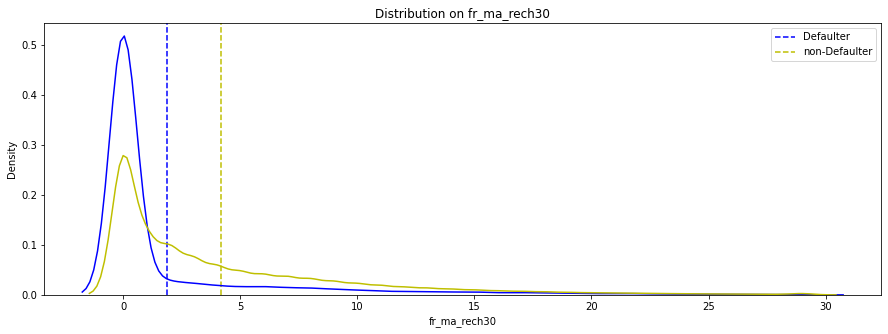

In [169]:
###fr_ma_rech30
show_distribution(data,'fr_ma_rech30')

Observations:

We can see that the distribution of labels 0 and 1 and well distinguished in the fr_ma_rech30.
The frequency of recharging the main account done for 30 days by non defaulers is greater than defaulters.

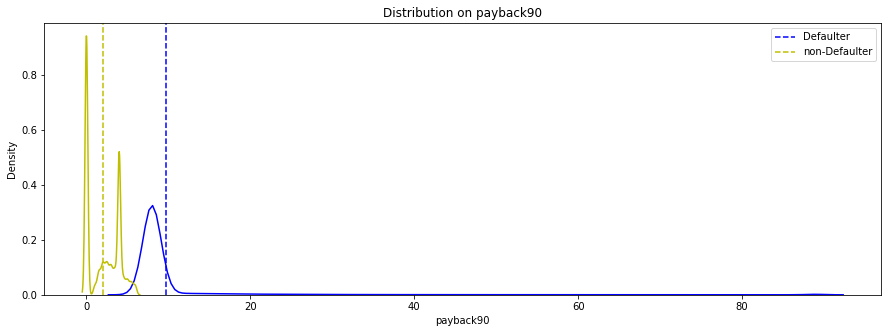

In [170]:
show_distribution(data,'payback90')

Observations:

After cleaning the payback variables show pretty good difference between labels 0 and 1.
On an average, the time taken by defaulters to payback the loan is greater than the time taken by non-defaulter to pay back the loan over a period of 30 or 90.

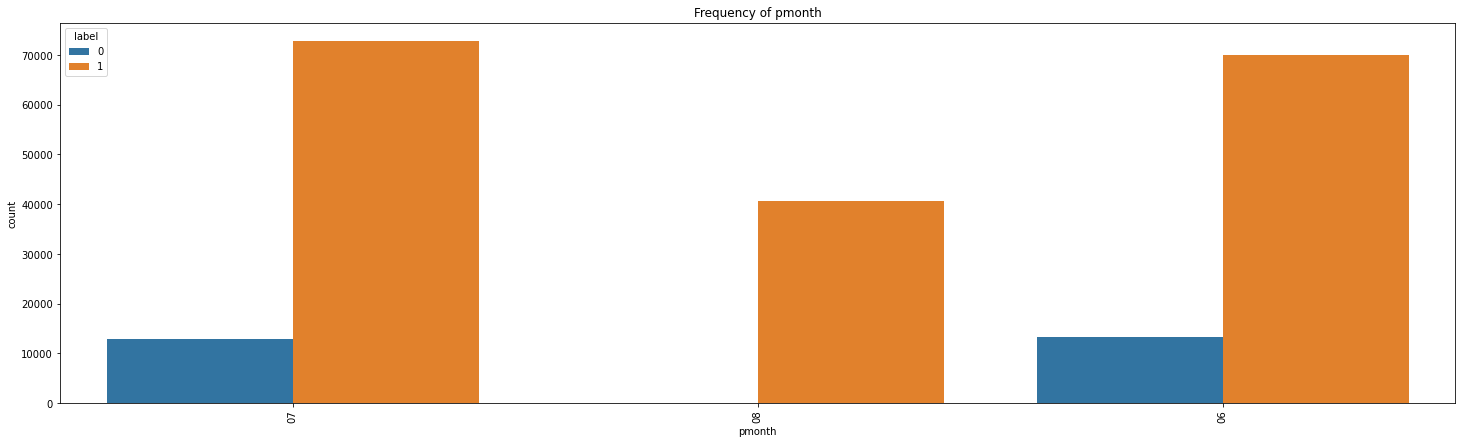

In [171]:
plt.figure(figsize=(25,7))
plt.title(f"Frequency of pmonth")
sns.countplot(data['pmonth'], hue = data['label'])
plt.xticks(rotation=90)
plt.show()

Observations:

The month of 6 and 7 have some defaulters. Month 8 does'nt have any defaulters.

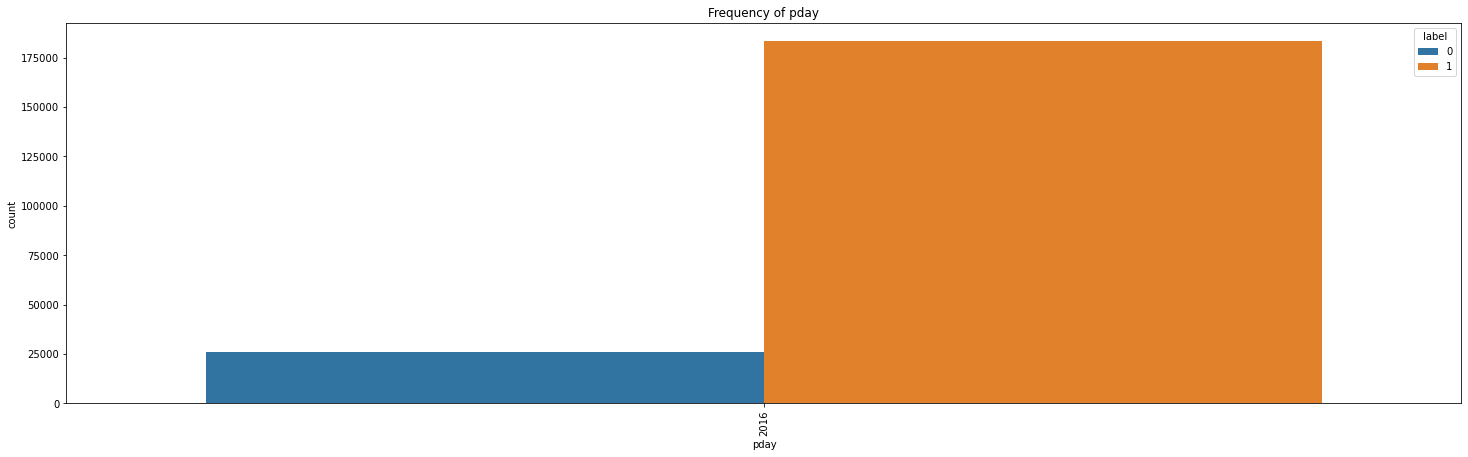

In [172]:
plt.figure(figsize=(25,7))
plt.title(f"Frequency of pday")
sns.countplot(data['pday'], hue = data['label'])
plt.xticks(rotation=90)
plt.show()

### Outliers

TypeError: Horizontal orientation requires numeric `x` variable.

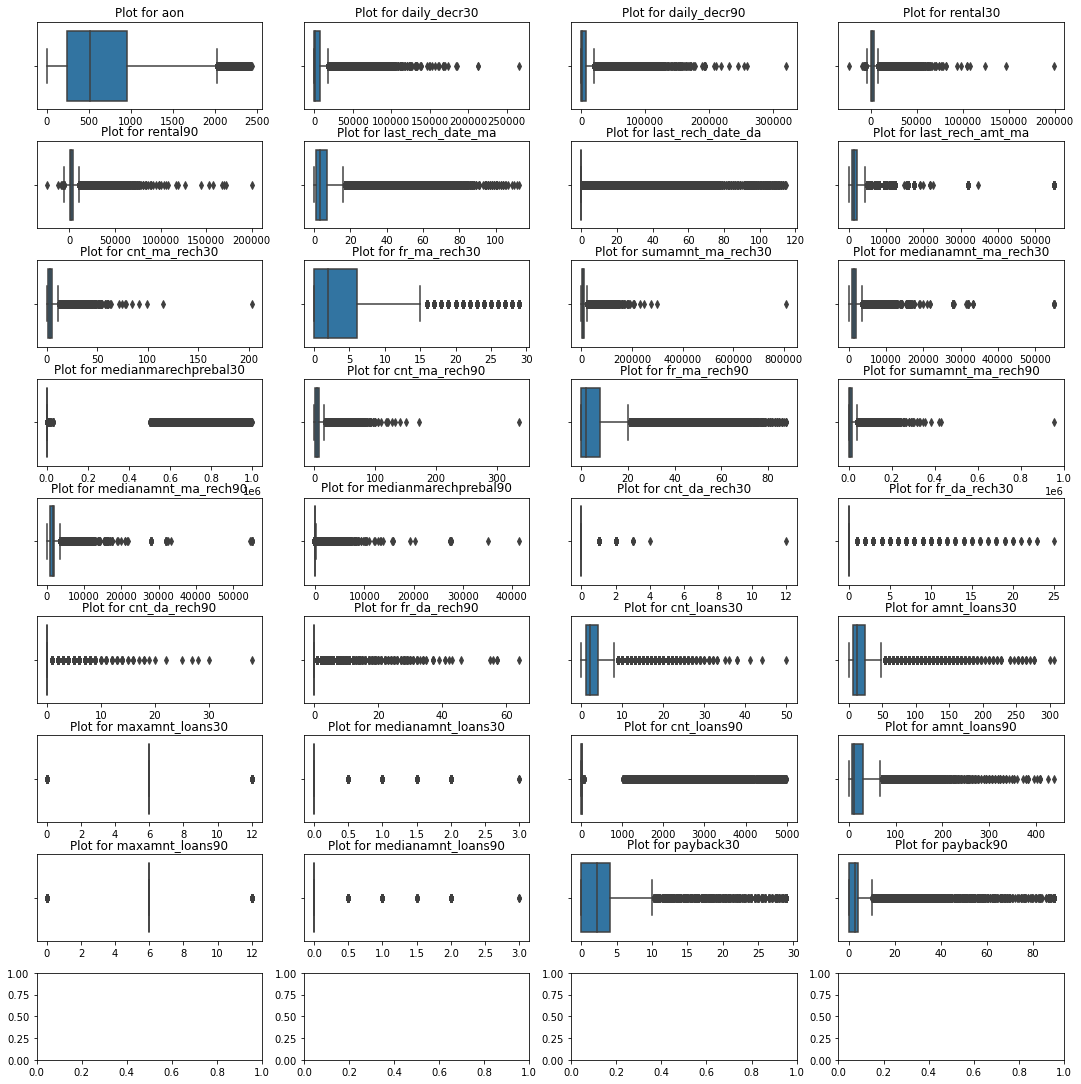

In [173]:
f,ax = plt.subplots(9,4,figsize=(15,15))
f.tight_layout()

i,j = 0,0
for col in data.iloc[:,2:-2].columns:
    graph = sns.boxplot(data[col], ax=ax[i,j])
    graph.set(xlabel=None)
    ax[i,j].set_title(f'Plot for {col}')
    
    j+=1
    if j%4==0:
        i+=1
        j=0

In [174]:
from scipy.stats import zscore
z_scores = np.abs(zscore(data.drop(['pcircle', 'pdate', 'pday','pmonth','label','msisdn'], axis=1)))

filter_df = (z_scores < 3).all(axis=1)


new_data_z = data[filter_df]
outlier_data_z = data[~filter_df]

print(f'Whole data with Outlier. Shape: {data.shape}')
print(f'New df without outlier. Shape: {new_data_z.shape}')
print(f'Outlier data shape: {outlier_data_z.shape}')
print(f'Total percentage of outlier in the data is {(data.shape[0]-new_data_z.shape[0])/data.shape[0]*100} %')

Whole data with Outlier. Shape: (209593, 38)
New df without outlier. Shape: (156033, 38)
Outlier data shape: (53560, 38)
Total percentage of outlier in the data is 25.554288549713018 %


In [175]:
threshold = 3
Q1 = data.drop(['pcircle', 'pdate', 'pday','pmonth','label','msisdn'], axis=1).quantile(0.25)
Q3 = data.drop(['pcircle', 'pdate', 'pday','pmonth','label','msisdn'], axis=1).quantile(0.75)
IQR = Q3 - Q1

outlier_data_iqr = data[((data < (Q1 - (threshold * IQR))) | (data > (Q3 + (threshold * IQR)))).any(axis=1)]
new_data_iqr = data[~((data < (Q1 - (threshold * IQR))) | (data > (Q3 + (threshold * IQR)))).any(axis=1)]

print(f'Whole data with Outlier. Shape: {data.shape}')
print(f'New data without outlier. Shape: {new_data_iqr.shape}')
print(f'Outlier data shape: {outlier_data_iqr.shape}')
print(f'Total percentage of outlier in the data is {(data.shape[0]-new_data_iqr.shape[0])/data.shape[0]*100} %')

Whole data with Outlier. Shape: (209593, 38)
New data without outlier. Shape: (112000, 38)
Outlier data shape: (97593, 38)
Total percentage of outlier in the data is 46.56310086691827 %


Observations:

There are a lot of outliers in the data. It is not good to remove this much data.
Since there is a large percentage of data as outliers, I am going to leave these outliers as they are with a benefit of doubt that these may be natural outliers.
I will use a robust method to transform the data.

## Feature selection

In [176]:
x = data.drop(['label','pcircle','pdate'], axis=1)
y = data['label']

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state=0, stratify = y)

In [179]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
print('Test score with out removing the outliers: ',lr.score(x_test, y_test))

Test score with out removing the outliers:  0.8751878623058756


Observations:

Without removing the outliers from the data is giving good results. Lets see if we can make it better with transformation and scaling.
### Finding Random State

In [180]:
from sklearn.metrics import roc_auc_score

In [182]:
best_train_score = 0
best_test_score = 0
r_state = 0
for i in range(0, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state=i,stratify=y)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)

    train_preds_proba = lr.predict(x_train)
    test_preds_proba = lr.predict(x_test)

    train_score = roc_auc_score(y_train, train_preds_proba)
    test_score = roc_auc_score(y_test, test_preds_proba)

    #Making sure that the variace is as low as possible
    if round(train_score*100,1) == round(test_score*100,1):
        if test_score > best_test_score:
            best_test_score = test_score
            best_train_score = train_score
            r_state = i
        
print(f'At the Random_State {r_state}, the model performs very well.')
print(f'Train score is {best_train_score*100}')
print(f'Test score is {best_test_score*100}')

At the Random_State 0, the model performs very well.
Train score is 50.0
Test score is 50.0


Observations:

Random state = 0 is giving the lowest variance. Hence choosing random state as 0 to split the data.

### Data Transformation and Scaling

In [183]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state=0, stratify = y)
from sklearn.preprocessing import PowerTransformer, RobustScaler

In [184]:
data.skew()

label                   -2.270254
msisdn                   0.018124
aon                      0.961912
daily_decr30             3.946246
daily_decr90             4.252578
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma        3.475709
last_rech_date_da        9.615459
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30             1.894954
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           12.012988
fr_da_rech30            14.301001
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30          1.435587
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

In [185]:
pt = PowerTransformer(standardize=False)
rs = RobustScaler()

In [186]:
x_rs = rs.fit_transform(x_train)
x_pt = pt.fit_transform(x_rs)

x_test_rs = rs.transform(x_test)
x_test_pt = pt.transform(x_test_rs)

In [187]:
lr = LogisticRegression()
lr.fit(x_rs, y_train)

train_preds_proba = lr.predict(x_rs)
test_preds_proba = lr.predict(x_test_rs)

train_score = roc_auc_score(y_train, train_preds_proba)
test_score = roc_auc_score(y_test, test_preds_proba)
print(train_score, test_score)

0.9901101779310265 0.98910944318701


In [188]:
lr = LogisticRegression()
lr.fit(x_pt, y_train)

train_preds_proba = lr.predict(x_pt)
test_preds_proba = lr.predict(x_test_pt)

train_score = roc_auc_score(y_train, train_preds_proba)
test_score = roc_auc_score(y_test, test_preds_proba)
print(train_score, test_score)

0.9978909398308223 0.9977064220183487


## Correlation

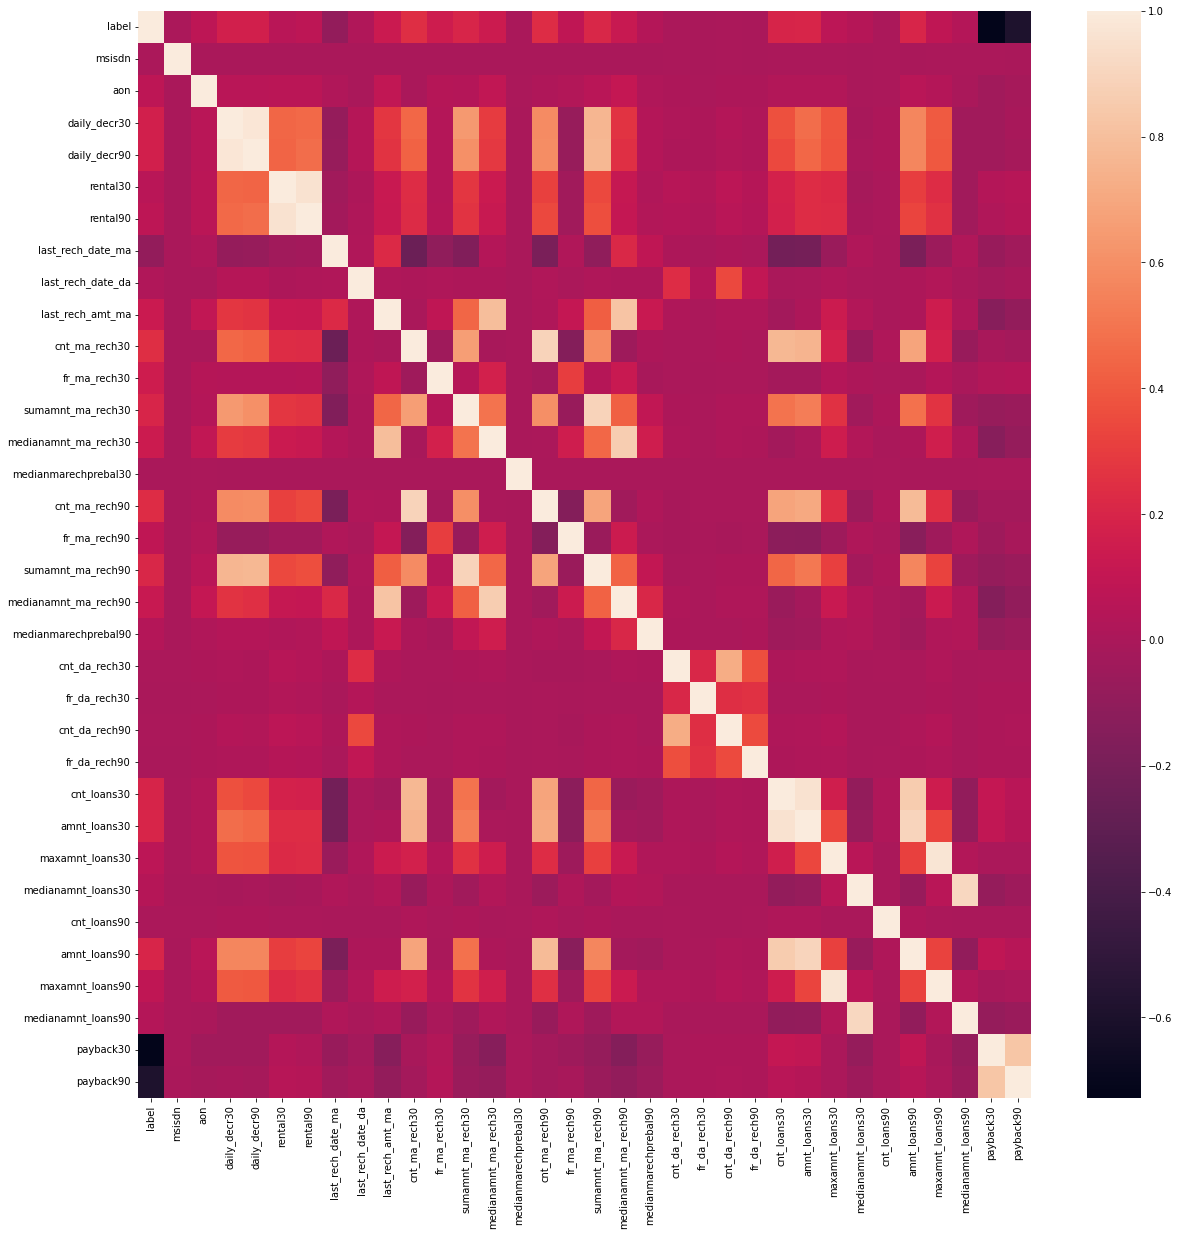

In [190]:
plt.figure(figsize=(20,20))
corr = data.corr()
sns.heatmap(corr)
plt.show()

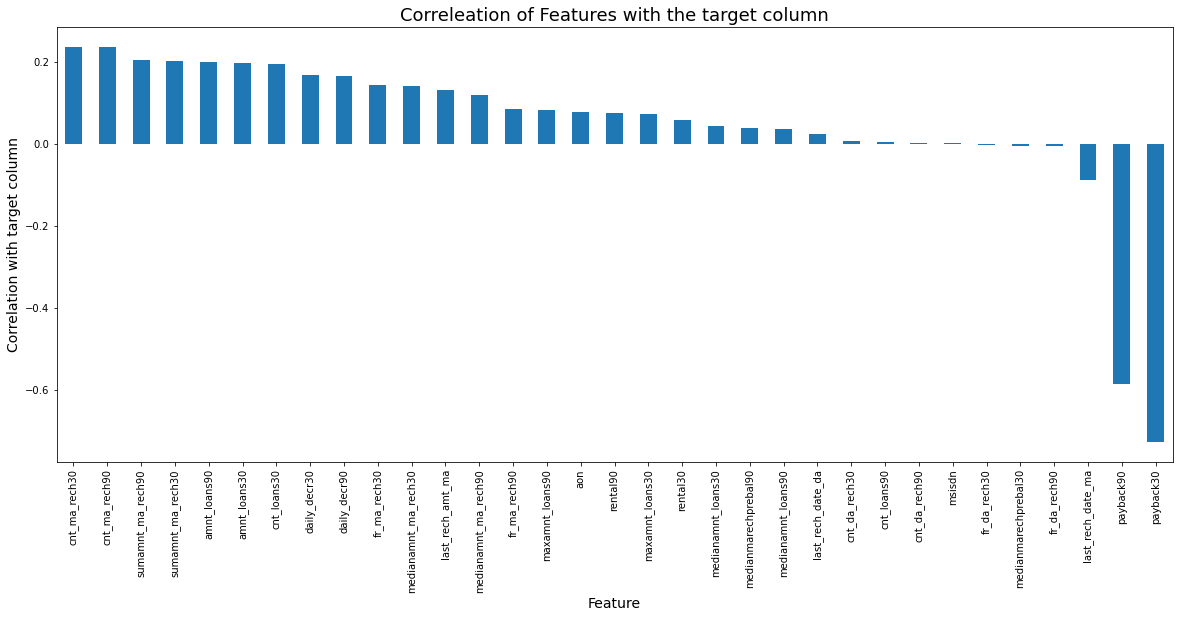

In [191]:
plt.figure(figsize=(20,8))
data.corr()['label'].sort_values(ascending = False).drop(['label'], axis=0).plot.bar()
plt.xlabel('Feature', fontsize = 14)
plt.ylabel('Correlation with target column', fontsize=14)
plt.title('Correleation of Features with the target column', fontsize = 18)
plt.show()

Observations:

The payback30 and payback90 show strong negative correlation with the target variable 'label'.
### Model Selection

In [192]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

LogisticRegression: Mean score: 0.999  Variance: 0.0
DecisionTreeClassifier: Mean score: 1.0  Variance: 0.0
GaussianNB: Mean score: 0.968  Variance: 0.0
SVC: Mean score: 0.999  Variance: 0.0


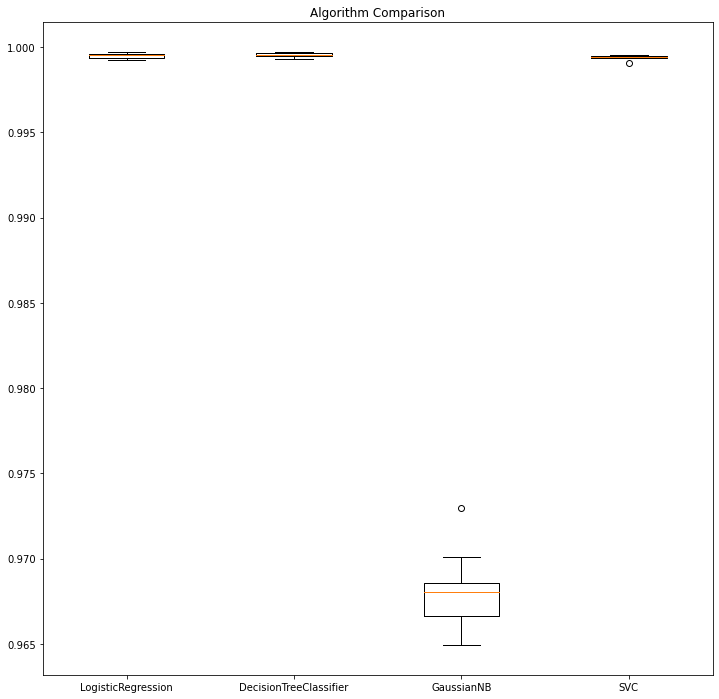

In [193]:
models = [LogisticRegression(class_weight='balanced',max_iter = 500),DecisionTreeClassifier(class_weight='balanced'),GaussianNB(),SVC(class_weight='balanced')]
results = []
m_names = []
for model in models:
    name = model.__class__.__name__
    kfold = KFold(n_splits=10, random_state=0, shuffle=True)
    cv_result = cross_val_score(model, x_pt, y_train, cv= kfold, scoring = 'f1_weighted',)
    results.append(cv_result)
    m_names.append(name)
    print(f"{name}: Mean score: {round(cv_result.mean(),3)}  Variance: {round(cv_result.var(),3)}")
    


# Compare Algorithms
plt.figure(figsize = (12,12))
plt.title('Algorithm Comparison')
plt.boxplot(results)
plt.xticks(np.arange(1,len(m_names)+1),labels=m_names)
plt.show()    

## Ensemble Techniques

In [194]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

AdaBoostClassifier: Mean score: 1.0  Variance: 0.0
GradientBoostingClassifier: Mean score: 1.0  Variance: 0.0
RandomForestClassifier: Mean score: 1.0  Variance: 0.0
XGBClassifier: Mean score: 1.0  Variance: 0.0


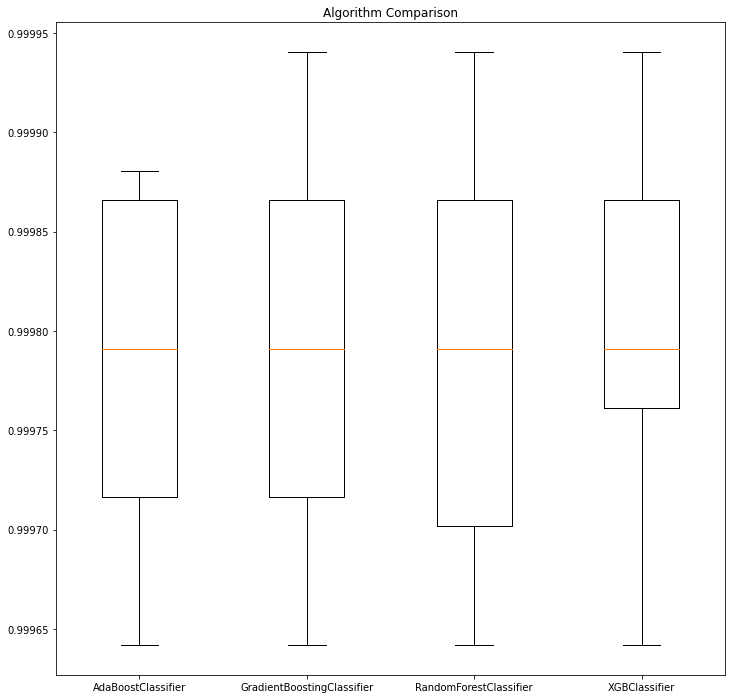

In [195]:
models = [AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(class_weight='balanced'),XGBClassifier()]
results = []
m_names = []



for model in models:
    name = model.__class__.__name__
    kfold = KFold(n_splits=10, random_state=0, shuffle=True)
    cv_result = cross_val_score(model, x_pt, y_train, cv= kfold, scoring = 'f1_weighted')
    results.append(cv_result)
    m_names.append(name)
    print(f"{name}: Mean score: {round(cv_result.mean(),3)}  Variance: {round(cv_result.var(),3)}")
    


# Compare Algorithms
plt.figure(figsize = (12,12))
plt.title('Algorithm Comparison')
plt.boxplot(results)
plt.xticks(np.arange(1,len(m_names)+1),labels=m_names)
plt.show()    

Observations:

1.All the models are showing good score. All the Ensemble techniques are performing better than simple models.

2.However, I am going to choose a simple model for this problem since the simple models are also giving us very good results with low complexity. I am choosing LogisticRegression and DecisionTreeClassifier for hyper parameter tuning since these models are simple and fast.

## HyperParameter Tuning

In [196]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline  
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

Tuning Logistic Regression

In [197]:
model = LogisticRegression(class_weight='balanced',max_iter = 500)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(x_pt, y_train)

In [198]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.999996 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.999996 (0.000004) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.999996 (0.000004) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.999996 (0.000004) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.999996 (0.000003) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.999996 (0.000003) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.999996 (0.000003) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.999996 (0.000003) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.999996 (0.000003) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.999995 (0.000004) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.999991 (0.000006) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.999991 (0.000006) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.999986 (0.000008) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.999956 (0.000016) with

In [199]:
grid_search.predict_proba(x_pt)

array([[0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [6.41166337e-08, 9.99999936e-01],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [3.18785222e-08, 9.99999968e-01],
       [0.00000000e+00, 1.00000000e+00]])

Tuning Decision Tree

In [200]:
model1 = DecisionTreeClassifier(class_weight='balanced')
criterion = ['gini', 'entropy']
splitter  = ['best','random']
max_depth = [2,3,5,7,9,11,15,20]
max_features = ['auto','log2', None]
# define grid search
grid1 = dict(criterion=criterion,splitter=splitter,max_depth=max_depth, max_features=max_features)
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
grid_search1 = GridSearchCV(estimator=model1, param_grid=grid1, n_jobs=-1, cv=cv1, scoring='roc_auc',error_score=0)
grid_result1 = grid_search1.fit(x_pt, y_train)

In [201]:
# summarize results
print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
means1 = grid_result1.cv_results_['mean_test_score']
stds1 = grid_result1.cv_results_['std_test_score']
params1 = grid_result1.cv_results_['params']
for mean1, stdev1, param1 in zip(means1, stds1, params1):
    print("%f (%f) with: %r" % (mean1, stdev1, param1))

Best: 0.999996 using {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'splitter': 'best'}
0.891762 (0.095457) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'splitter': 'best'}
0.795541 (0.101603) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'splitter': 'random'}
0.895645 (0.105276) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'splitter': 'best'}
0.789154 (0.094202) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'splitter': 'random'}
0.999164 (0.000551) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'splitter': 'best'}
0.944576 (0.049295) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'splitter': 'random'}
0.917298 (0.075723) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'splitter': 'best'}
0.827168 (0.090867) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'splitter': 'random'}
0.950941 (0.058715) with: {'

In [202]:
grid_search1.predict_proba(x_pt)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

## Creating Pipeline

In [203]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [204]:
dropping = ColumnTransformer(remainder='passthrough',
                                transformers=[('drop_columns', 'drop', ['pcircle','pdate'])])

Tuned Logistic Regression Pipeline

In [205]:
pipe_steps_lr = [('drop_columns', dropping),
                    ('robust_scaler', RobustScaler()),
                     ('power_transform', PowerTransformer()),
                     ('logistic_regression_model', LogisticRegression(class_weight = 'balanced',C= 10, penalty ='l2', solver = 'lbfgs', max_iter=500))]

pipe_lr = Pipeline(steps = pipe_steps_lr)

Tuned DecisionTreeClassification Pipeline

In [206]:
pipe_steps_dt = [('drop_columns', dropping),
                    ('robust_scaler', RobustScaler()),
                     ('power_transform', PowerTransformer()),
                     ('decision_tree_model', DecisionTreeClassifier(class_weight = 'balanced',criterion = 'entropy', max_depth = 5, max_features = None, splitter = 'best'))]

pipe_dtc = Pipeline(steps = pipe_steps_dt)

Splitting the feature and target

In [208]:
X = data.drop(['label','pmonth','pday'], axis=1)
y = data['label']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=0,stratify=y)

Fitting the pipeline

In [209]:
pipe_lr.fit(x_train, y_train)
pipe_dtc.fit(x_train, y_train)

Pipeline(steps=[('drop_columns',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['pcircle', 'pdate'])])),
                ('robust_scaler', RobustScaler()),
                ('power_transform', PowerTransformer()),
                ('decision_tree_model',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=5))])

Making Predictions

In [210]:
#Logistic Regression
lr_train_predictions_proba = pipe_lr.predict_proba(x_train)
lr_test_predictions_proba = pipe_lr.predict_proba(x_test)

lr_train_predictions = pipe_lr.predict(x_train)
lr_test_predictions = pipe_lr.predict(x_test)

#Decision tree classifier
dtc_train_predictions_proba = pipe_dtc.predict_proba(x_train)
dtc_test_predictions_proba = pipe_dtc.predict_proba(x_test)

dtc_train_predictions = pipe_dtc.predict(x_train)
dtc_test_predictions = pipe_dtc.predict(x_test)

In [211]:
from sklearn.metrics import log_loss,roc_auc_score
from sklearn.metrics import roc_curve

Evaluation Logistic Regression pipeline

In [212]:
print("Logistic regression Training data scores:")
print(f"The logloss is: {log_loss(y_train, lr_train_predictions_proba)}")
print(f"The ROC AUC score: {roc_auc_score(y_train, lr_train_predictions, average = 'weighted')}")
print(f"Confusion Matrix: \n{confusion_matrix(y_train, lr_train_predictions)}")
print(f'Classification Report: \n{classification_report(y_train, lr_train_predictions)}')

Logistic regression Training data scores:
The logloss is: 0.0018053972636587735
The ROC AUC score: 0.9991303772045923
Confusion Matrix: 
[[ 18285     28]
 [    27 128375]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18313
           1       1.00      1.00      1.00    128402

    accuracy                           1.00    146715
   macro avg       1.00      1.00      1.00    146715
weighted avg       1.00      1.00      1.00    146715



In [213]:
print("Logistic regression Testing data scores:")
print(f"The logloss is: {log_loss(y_test, lr_test_predictions_proba)}")
print(f"The ROC AUC score: {roc_auc_score(y_test, lr_test_predictions, average = 'weighted')}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, lr_test_predictions)}")
print(f'Classification Report: \n{classification_report(y_test, lr_test_predictions)}')

Logistic regression Testing data scores:
The logloss is: 0.002007718309351927
The ROC AUC score: 0.9990901935187135
Confusion Matrix: 
[[ 7837    12]
 [   16 55013]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7849
           1       1.00      1.00      1.00     55029

    accuracy                           1.00     62878
   macro avg       1.00      1.00      1.00     62878
weighted avg       1.00      1.00      1.00     62878



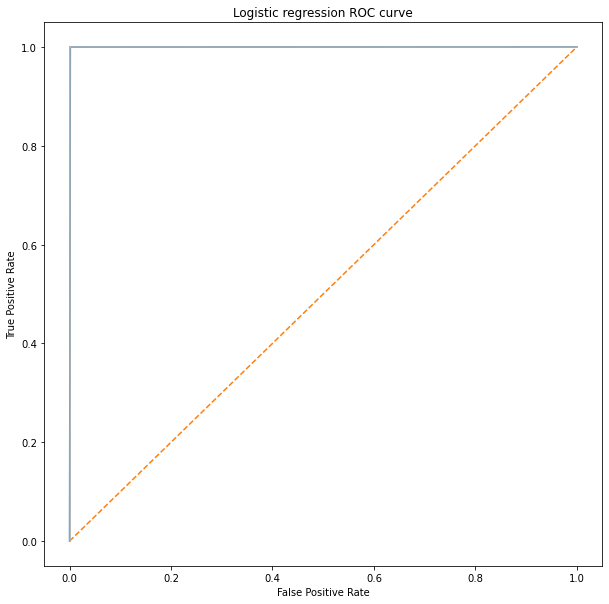

In [214]:
false_positive_rate_lr, true_positive_rate_lr, threshold_lr = roc_curve(y_test, lr_test_predictions)
plt.subplots(1, figsize=(10,10),)
plt.title('Logistic regression ROC curve')
plt.plot(false_positive_rate_lr, true_positive_rate_lr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Evaluation DecisionTreeClassifier pipeline

In [215]:
print("Decision Tree Classifier Training data scores:")
print(f"The logloss is: {log_loss(y_train, dtc_train_predictions_proba)}")
print(f"The ROC AUC score: {roc_auc_score(y_train, dtc_train_predictions, average = 'weighted')}")
print(f"Confusion Matrix: \n{confusion_matrix(y_train, dtc_train_predictions)}")
print(f'Classification Report: \n{classification_report(y_train, dtc_train_predictions)}')

Decision Tree Classifier Training data scores:
The logloss is: 0.0015808446201500373
The ROC AUC score: 0.9991263037186697
Confusion Matrix: 
[[ 18281     32]
 [     0 128402]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18313
           1       1.00      1.00      1.00    128402

    accuracy                           1.00    146715
   macro avg       1.00      1.00      1.00    146715
weighted avg       1.00      1.00      1.00    146715



In [216]:
print("Decision Tree Classifier Testing data scores:")
print(f"The logloss is: {log_loss(y_test, dtc_test_predictions_proba)}")
print(f"The ROC AUC score: {roc_auc_score(y_test, dtc_test_predictions, average = 'weighted')}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, dtc_test_predictions)}")
print(f'Classification Report: \n{classification_report(y_test, dtc_test_predictions)}')

Decision Tree Classifier Testing data scores:
The logloss is: 0.0014648957507930095
The ROC AUC score: 0.9993629761753089
Confusion Matrix: 
[[ 7839    10]
 [    0 55029]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7849
           1       1.00      1.00      1.00     55029

    accuracy                           1.00     62878
   macro avg       1.00      1.00      1.00     62878
weighted avg       1.00      1.00      1.00     62878



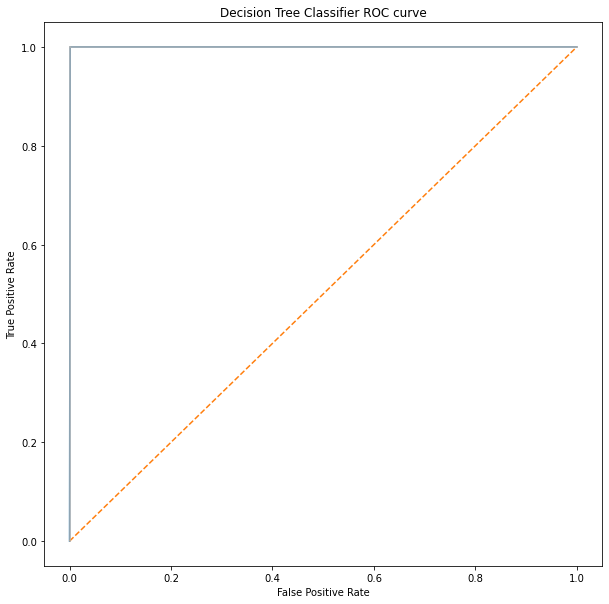

In [217]:
false_positive_rate_dt, true_positive_rate_dt, threshold_dt = roc_curve(y_test, dtc_test_predictions)
plt.subplots(1, figsize=(10,10))
plt.title('Decision Tree Classifier ROC curve')
plt.plot(false_positive_rate_dt, true_positive_rate_dt)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Conclusions:

1.The Desicion Tree Classifier is giving slightly a better result than Logistic Regression. The log_loss of DecisionTree is slightly lesser than Logistic Regression. The Confusion matrix also shows slightly better results for Decision Tree in the test set.

2.Both models are able to learn the data pretty well.

3.The performance shows low bias and low variance.

4.Final model chosen is the DecisionTreeClassifier.


## Serializing the pipeline for Production

In [219]:
import joblib

In [221]:
joblib.dump(pipe_dtc, 'MicroCredit_defaulter_prediction.obj')


['MicroCredit_defaulter_prediction.obj']

## Model Dashboard

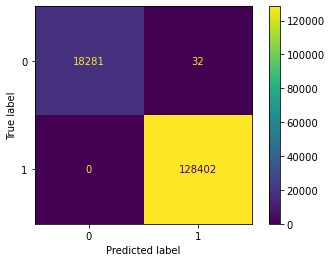

In [222]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipe_dtc, x_train, y_train)

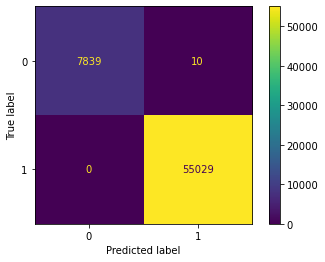

In [223]:
plot_confusion_matrix(pipe_dtc, x_test, y_test)